# Examen Parcial 1 (Gráficas)

Elaborar las siguientes gráficas a partir de sus matrices de adyacencia. (no son digráficas!)

1. Malla triangular
2. Ciclo de Watts-Strogatz
3. Teseracto
4. Mariposa

In [2]:
import numpy as np
import networkx as nx
%matplotlib inline

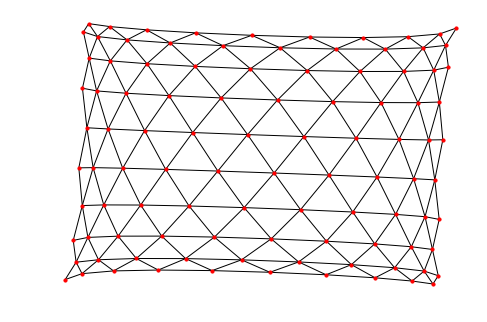

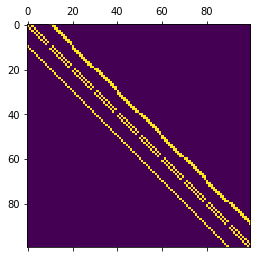

In [5]:
# malla

m = np.zeros((100,100), dtype=int)
for i in range(1, 9):
    for j in range(1, 9):
        #nodos de grado 4
        m[10*i+j, 10*i+j-1]=\
        m[10*i+j, 10*i+j+1]=\
        m[10*i+j, 10*(i-1)+j]=\
        m[10*i+j, 10*(i+1)+j]=1
#nodos de grado 3
i=0
for j in range(1, 9):
    m[10*i+j, 10*(i+1)+j] =\
    m[10*i+j, 10*i+j-1] =\
    m[10*i+j, 10*i+j+1] = 1
i=9
for j in range(1, 9):
    m[10*i+j, 10*(i-1)+j]=\
    m[10*i+j, 10*i+j-1] =\
    m[10*i+j, 10*i+j+1] = 1
j=0
for i in range(1, 9):
    m[10*i+j, 10*(i+1)+j] =\
    m[10*i+j, 10*(i-1)+j] =\
    m[10*i+j, 10*i+j+1] = 1
j=9
for i in range(1, 9):
    m[10*i+j, 10*(i+1)+j]=\
    m[10*i+j, 10*(i-1)+j] =\
    m[10*i+j, 10*i+j-1] = 1
#nodos de grado 2
m[0, 1] = m[0, 10] =\
m[90, 91] = m[90, 80] =\
m[9, 8] = m[9, 19] =\
m[99, 98] = m[99, 89] = 1

#diagonales
for i in range(0,9,2):
    for j in range(0, 9):
        m[10*i+j, 10*(i+1)+j+1] = 1
for i in range(1,9,2):
    for j in range(1, 10):
        m[10*i+j, 10*(i+1)+j-1] = 1

g = nx.Graph(m)
pos = nx.spectral_layout(g)
nx.draw(g, pos, node_size=10)
import matplotlib.pyplot as plt
plt.matshow(m)

In [19]:
(np.arange(100)+7)%100

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 96, 97, 98, 99,  0,  1,  2,  3,  4,  5,  6])

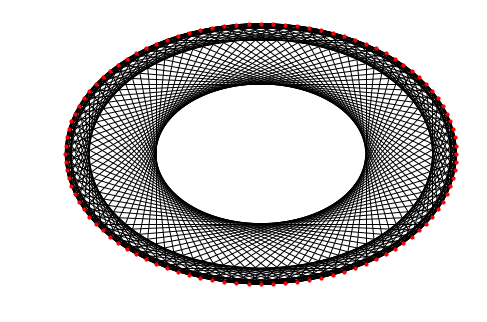

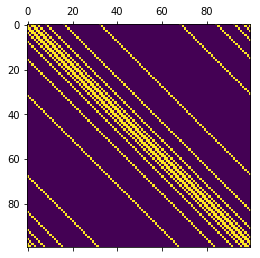

In [16]:
# ciclo WS

ws = np.zeros((100,100), dtype=int)
for i in range(100):
    for e in range(6):
        ws[i, (i+2**e)%100]=1
        ws[i, (i-2**e+100)%100]=1

g = nx.Graph(ws)
pos = nx.shell_layout(g)
#pos = nx.spring_layout(g, iterations=100)
nx.draw(g, pos, node_size=10)
plt.matshow(ws)

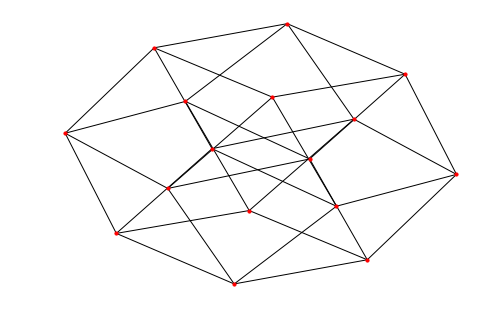

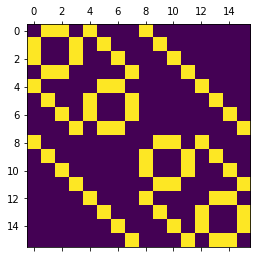

In [20]:
#cubo

q = np.zeros((16, 16), dtype=int)

for i in range(16):
    q[i, i ^ 1<<0 ]=\
    q[i, i ^ 1<<1 ]=\
    q[i, i ^ 1<<2 ]=\
    q[i, i ^ 1<<3 ]=1

g = nx.Graph(q)
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_size=10)
plt.matshow(q)

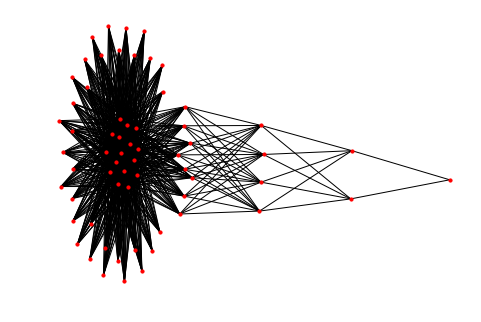

In [21]:
# mariposa
"""Los 2**i nodos de la capa i se conectan a los 2**(i+1) nodos de la siguiente capa."""

def primero(capa):
    return 2**capa - 1



capas = 6
n = 2**(capas)-1
m = np.zeros((n, n), dtype=int)
for capa in range(capas - 1):
    for i in range(2**capa - 1, 2**(capa+1)-1):
        for j in range(2**(capa+1)-1, 2**(capa+2)-1):
            m[i, j]=1
            m[j, i]=1
g = nx.Graph(m)
pos = nx.spring_layout(g, iterations=50)

nx.draw(g, pos, node_size=10)